In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.externals import joblib

#### DATADIR to DI PA to train model

In [2]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v3/train"

In [2]:
DATADIR = "/home/apofeo/Documents/symbols_noise"

In [2]:
DATADIR = "/home/apofeo/Documents/symbols_noise_back"

In [2]:
DATADIR = "/home/apofeo/Documents/symbols_noise_new_v2"

In [43]:
DATADIR = "/home/apofeo/Documents/symbols_test"

In [2]:
DATADIR = "/home/apofeo/Documents/car_logos"

#### DATADIR to DI PA to evaluate model

In [42]:
DATADIR = "im_base_to_angle/DI_PA_Test/test"

#### DATADIR to CI PA to evaluate model

In [3]:
DATADIR = "im_base_to_angle/rotated_5_pa/test"

#### DATADIR to CI NA to evaluate model

In [24]:
DATADIR = "im_base_to_angle/rotated_4_na/test"

In [3]:
directories = [x[0] for x in os.walk(DATADIR)]

In [4]:
# print(directories[1:])
# print(len(directories[1:]))
# print(directories.split("/"))
CATEGORIES = []
for folder in directories[1:]:
    CATEGORIES.append(folder.split("/")[-1])
CATEGORIES = sorted(CATEGORIES)
print(CATEGORIES)
print(len(CATEGORIES))

['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
40


In [3]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
# print(CATEGORIES)

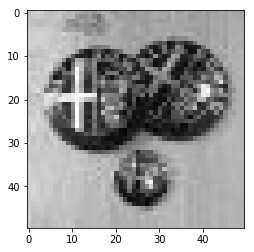

In [5]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [56]:
print(img_array)

[[ 88  88  84 ...  70  65  75]
 [ 85  93  98 ...  66  69  75]
 [ 81  89  98 ...  62  56  54]
 ...
 [ 67  73  85 ... 101 103 101]
 [ 40  57  84 ... 102 102  98]
 [ 67  66  80 ... 101 101  96]]


In [26]:
print(img_array.shape)

(56, 40)


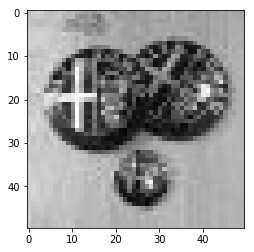

(50, 50)


In [6]:
IMG_SIZE_X, IMG_SIZE_Y = 50, 50

new_array = cv2.resize(img_array, (IMG_SIZE_Y, IMG_SIZE_X))
plt.imshow(new_array, cmap='gray')
plt.show()
print(new_array.shape)

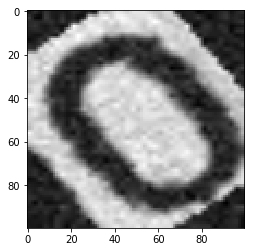

In [34]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

In [8]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE_Y, IMG_SIZE_X))  # resize to normalize data size
#                 path_to_img = os.path.join(path,img)
#                 training_data.append([new_array, class_num, path_to_img])  # add this to our training_data
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [9]:
create_training_data()

100%|██████████| 406/406 [00:00<00:00, 2388.67it/s]


In [63]:
# print(training_data[0])

In [10]:
print(len(training_data))

20778


In [11]:
import random

In [12]:
random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

3
33
22
2
16
3
30
16
18
24


In [14]:
X = []
Y = []
# Z = []

In [15]:
for features,label in training_data:
    X.append(features)
    Y.append(label)
    
# for features,label, path in training_data:
#     X.append(features)
#     Y.append(label)
#     Z.append(path)

In [16]:
print(X[0].shape)

(50, 50)


In [21]:
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

In [17]:
X = np.array(X).reshape(-1, IMG_SIZE_Y, IMG_SIZE_X, 1)

In [18]:
print(type(X))
print(X[0])

<class 'numpy.ndarray'>
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[2]
  [2]
  [3]
  ...
  [2]
  [2]
  [2]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [1]
  [2]
  [2]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [59]:
# import pickle

In [19]:
# pickle_out = open("trained_data/X_to_E_DI_PA.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

filename = 'trained_data/X_car_logos.sav'
joblib.dump(X, filename)

['trained_data/X_car_logos.sav']

In [20]:
# pickle_out = open("trained_data/X_to_E_DI_PA.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

filename = 'trained_data/Y_car_logos.sav'
joblib.dump(Y, filename)

['trained_data/Y_car_logos.sav']

In [22]:
filename = 'trained_data/X_CLP_SYMBOLS_NEW.sav'
loaded_X = joblib.load(filename)
filename = 'trained_data/Y_CLP_SYMBOLS_NEW.sav'
loaded_Y = joblib.load(filename)

In [23]:
index = 4
# plt.imshow(loaded_X[index])
print(f'{loaded_Y[index]} ({CATEGORIES[loaded_Y[index]]})' )
print(loaded_X[index].shape)
print(type(loaded_X[index]))

11 (В)
(50, 50, 1)
<class 'numpy.ndarray'>


In [58]:
filename = 'trained_data/to_test/X_CLP_SYMBOLS_test_30x30.sav'
joblib.dump(X, filename)

['trained_data/to_test/X_CLP_SYMBOLS_test_30x30.sav']

In [59]:
filename = 'trained_data/to_test/Y_CLP_SYMBOLS_test_30x30.sav'
joblib.dump(Y, filename)

['trained_data/to_test/Y_CLP_SYMBOLS_test_30x30.sav']

In [60]:
filename = 'trained_data/to_test/Z_CLP_SYMBOLS_test_30x30.sav'
joblib.dump(Z, filename)

['trained_data/to_test/Z_CLP_SYMBOLS_test_30x30.sav']